In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns

user_id: customer account number.

attrition_flag: customer status (Existing and Attrited).

customer_age: age of the customer.

gender: gender of customer (M for male and F for female).

dependent_count: number of dependents of customers.

education_level: customer education level (Uneducated, High School, Graduate,
College, Post-Graduate, Doctorate, and Unknown).

marital_status: customer's marital status (Single, Married, Divorced, and Unknown).

income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).

card_category: type of card used (Blue, Silver, Gold, and Platinum).

months_on_book: period of being a customer (in months).

total_relationship_count: the number of products used by customers in the bank.

months_inactive_12_mon: period of inactivity for the last 12 months.

contacts_count_12_mon: the number of interactions between the bank and the
customer in the last 12 months.

credit_limit: credit card transaction nominal limit in one period.

total_revolving_bal: total funds used in one period.

avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.

total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.

total_trans_amt: total nominal transaction in the last 12 months.

total_trans_ct: the number of transactions in the last 12 months.

total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.

avg_utilization_ratio: percentage of credit card usage.


In [2]:
import pandas as pd

# Load dataset dari URL ke dalam DataFrame
url = "https://bit.ly/adv_bi_bank_cust_churn"
df = pd.read_csv(url)

# Tampilkan beberapa baris pertama untuk memastikan data berhasil dimuat
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [4]:
df.duplicated().sum()

0

#Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?


In [5]:
df['attrition_flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
# Menampilkan nilai unik customer_age yang sudah diurutkan
unique_customer_age = sorted(df['customer_age'].unique())
print(unique_customer_age)

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73]


In [7]:
# Membuat tabel dengan jumlah Existing dan Attrited Customer berdasarkan usia
age_churn_counts = df.groupby(['customer_age', 'attrition_flag']).size().unstack(fill_value=0)

# Menambahkan kolom churn rate
age_churn_counts['Churn_Rate'] = age_churn_counts['Attrited Customer'] / (age_churn_counts['Attrited Customer'] + age_churn_counts['Existing Customer'])

# Melihat 5 usia dengan churn rate tertinggi
age_churn_counts.sort_values(by='Existing Customer', ascending=False).head(10)


attrition_flag,Attrited Customer,Existing Customer,Churn_Rate
customer_age,,,
49,79,416,0.159596
44,84,416,0.168000
46,82,408,0.167347
45,79,407,0.162551
47,76,403,0.158664
43,85,388,0.179704
48,85,387,0.180085
50,71,381,0.157080
42,62,364,0.145540


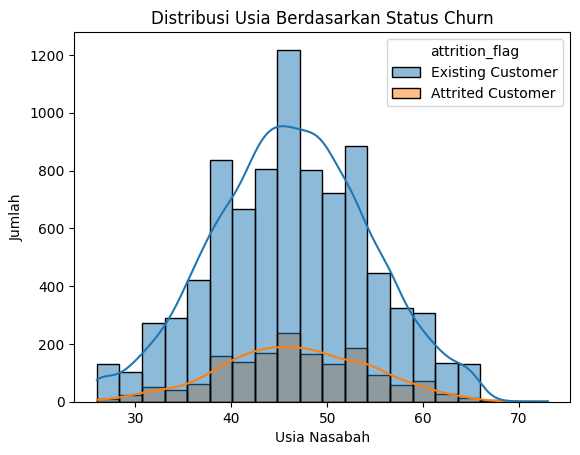

In [8]:
sns.histplot(data=df, x='customer_age', hue='attrition_flag', bins=20, kde=True)
plt.title('Distribusi Usia Berdasarkan Status Churn')
plt.xlabel('Usia Nasabah')
plt.ylabel('Jumlah')
plt.show()


Dari histogram yang telah dianalisis, kita dapat melihat bahwa distribusi usia pelanggan cenderung terdistribusi di berbagai kelompok usia. Namun, terdapat kecenderungan tertentu pada kelompok usia nasabah yang masih aktif (Existing Customer).

Existing Customer: Sebagian besar pelanggan yang masih aktif atau Existing Customer berada pada rentang usia antara 42 hingga 51 tahun, dengan puncak tertinggi pada usia 49 tahun. Hal ini menunjukkan bahwa banyak pelanggan yang masih setia menggunakan layanan berada di usia dewasa, mungkin sekitar usia produktif.

Attrited Customer: Di sisi lain, Attrited Customer (pelanggan yang sudah berhenti atau tidak lagi menggunakan layanan) memiliki konsentrasi pada rentang usia 48 hingga 54 tahun, dengan puncak tertinggi juga pada usia 49 tahun. Ini menunjukkan bahwa pelanggan yang berhenti menggunakan layanan cenderung berada pada usia yang sedikit lebih tua dibandingkan dengan pelanggan yang masih aktif.

Puncak Usia 49: Terlihat bahwa baik Existing Customer maupun Attrited Customer memiliki puncak di usia yang sama, yaitu 49 tahun. Hal ini menarik karena usia ini mungkin merupakan titik kritis, di mana pelanggan pada usia tersebut memiliki kecenderungan untuk berhenti menggunakan layanan atau mulai mempertimbangkan alternatif lain, tetapi juga bisa menunjukkan adanya loyalitas pada usia tersebut.

Dari analisis distribusi usia ini, kita dapat menyarankan beberapa hal:

Strategi Retensi: Pelanggan pada rentang usia 48-54 yang cenderung menjadi attrited customer perlu mendapatkan perhatian khusus. Mungkin layanan yang lebih personal atau penawaran produk yang sesuai dengan kebutuhan kelompok usia ini dapat meningkatkan loyalitas mereka.
Segmentasi Usia: Mengingat bahwa usia 49 adalah puncak untuk kedua kelompok, perusahaan bisa memfokuskan upaya retensi lebih pada kelompok usia ini, dengan memanfaatkan pendekatan yang lebih sesuai dengan karakteristik demografis dan kebutuhan mereka.

# Apakah Terdapat Korelasi antara Tingkat Pendidikan dan Income Category? Bagaimana Korelasi dari Kedua Prediktor Tersebut Terhadap Attrited Customer?

In [9]:
# Membuat crosstab antara education_level dan income_category
crosstab_education_income = pd.crosstab(df['education_level'], df['income_category'])

print(crosstab_education_income)


income_category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
education_level                                                    
College               70          183          132           175   
Doctorate             37           70           59            57   
Graduate             204          553          422           478   
High School          147          355          307           308   
Post-Graduate         30          111           77            81   
Uneducated           119          249          195           217   
Unknown              120          269          210           219   

income_category  Less than $40K  Unknown  
education_level                           
College                     345      108  
Doctorate                   158       70  
Graduate                   1139      332  
High School                 671      225  
Post-Graduate               170       47  
Uneducated                  522      185  
Unknown                     556      145  


In [10]:
from scipy.stats import chi2_contingency

# Misalkan 'crosstab_education_income' adalah tabel kontingensi antara education_level dan income_category
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_education_income)

# Menampilkan hasil
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")


Chi-Square Statistic: 45.25368499626265
p-value: 0.03655347346001099


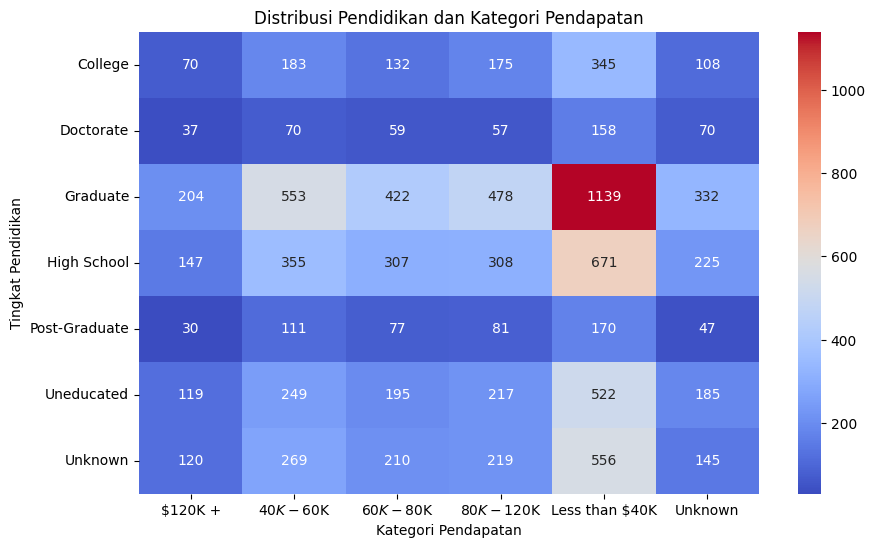

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap untuk melihat distribusi antara pendidikan dan pendapatan
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_education_income, annot=True, cmap="coolwarm", fmt='d')
plt.title('Distribusi Pendidikan dan Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Tingkat Pendidikan')
plt.show()


Dengan p-value = 0.0365, kita dapat menyimpulkan bahwa ada hubungan signifikan antara pendidikan dan kategori pendapatan. Ini berarti bahwa tingkat pendidikan seseorang lebih terkait dengan kategori pendapatan yang mereka miliki. Sebagai contoh, seseorang dengan pendidikan tinggi cenderung memiliki pendapatan yang lebih tinggi, sementara mereka yang memiliki pendidikan lebih rendah mungkin lebih sering terdistribusi di kategori pendapatan yang lebih rendah.




#Apakah Terdapat Perbedaan yang Signifikan antara Gender dengan Kemungkinan Nasabah untuk Menjadi Attrited Customer?

In [12]:
from scipy.stats import chi2_contingency
import pandas as pd

# Misalkan df adalah DataFrame yang berisi data dengan kolom 'gender' dan 'attrition_flag'
# Membuat tabel kontingensi
crosstab_gender_attrition = pd.crosstab(df['gender'], df['attrition_flag'])

# Melakukan uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_gender_attrition)

# Menampilkan hasil
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")


Chi-Square Statistic: 13.86561370063734
p-value: 0.00019635846717310307


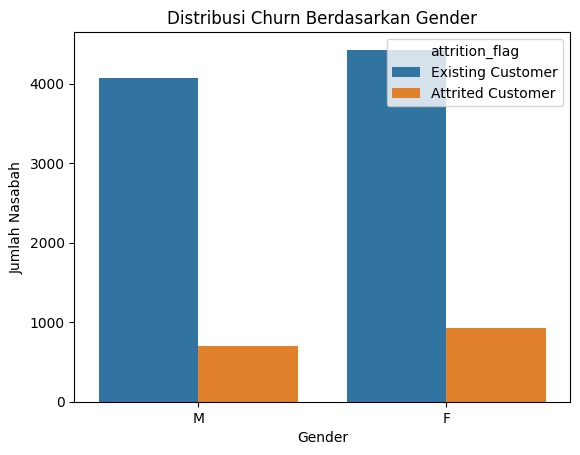

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat bar plot untuk visualisasi distribusi churn berdasarkan gender
sns.countplot(x='gender', hue='attrition_flag', data=df)
plt.title('Distribusi Churn Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Nasabah')
plt.show()


Hasil analisis menunjukkan bahwa baik untuk gender perempuan (F) maupun laki-laki (M), lebih banyak nasabah yang tidak churn (Existing Customer) dibandingkan dengan yang churn (Attrited Customer), meskipun ada hubungan signifikan secara statistik (p-value < 0.05), hal ini mengindikasikan bahwa gender memang berhubungan dengan kemungkinan churn, namun jumlah churn relatif lebih rendah pada kedua gender. Ini bisa berarti, misalnya, bahwa laki-laki atau perempuan memiliki tingkat churn yang berbeda. Misalnya, bisa jadi gender tertentu lebih cenderung churn, atau mungkin program retensi perlu disesuaikan berdasarkan gender.

#Apakah Semakin Lama Customer Menjadi Nasabah Maka Semakin Kecil Kemungkinan Nasabah Tersebut untuk Menjadi Attrited Customer?

In [14]:
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

df['attrition_flag_numeric'] = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Korelasi antara 'months_on_book' dan 'attrition_flag_numeric'
corr, _ = spearmanr(df['months_on_book'], df['attrition_flag_numeric'])

# Menggunakan t-test untuk membandingkan months_on_book antara churn dan non-churn
churned = df[df['attrition_flag_numeric'] == 1]['months_on_book']
non_churned = df[df['attrition_flag_numeric'] == 0]['months_on_book']

# Melakukan t-test
t_stat, p_value = ttest_ind(churned, non_churned)

print(f'Korelasi Spearman: {corr}')
print(f't-statistic: {t_stat}, p-value: {p_value}')

Korelasi Spearman: 0.015299580450874529
t-statistic: 1.377341848122166, p-value: 0.16843702876495353


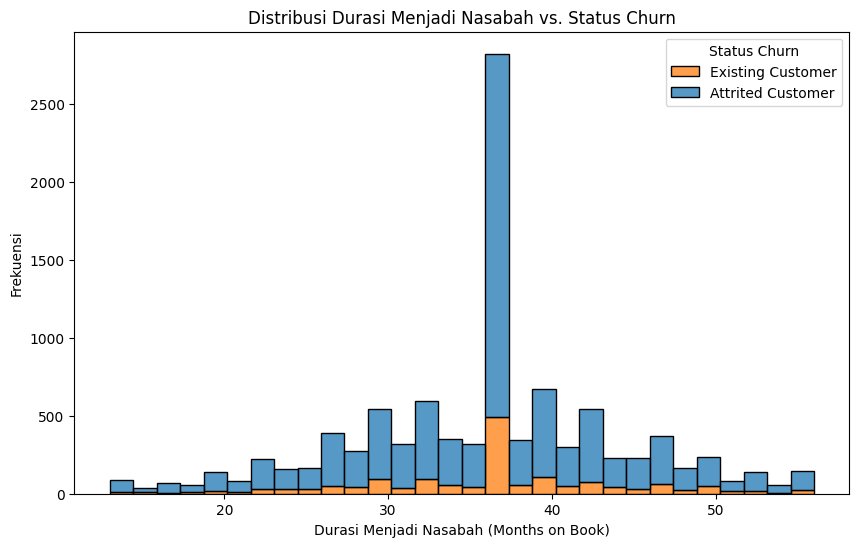

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame yang berisi data dengan kolom 'months_on_book' dan 'attrition_flag'
# Mengubah 'attrition_flag' menjadi numerik jika perlu (0 = Existing Customer, 1 = Attrited Customer)
df['attrition_flag_numeric'] = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Membuat histogram untuk membandingkan months_on_book antara churn dan non-churn
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='months_on_book', hue='attrition_flag', multiple='stack', bins=30)

plt.title('Distribusi Durasi Menjadi Nasabah vs. Status Churn')
plt.xlabel('Durasi Menjadi Nasabah (Months on Book)')
plt.ylabel('Frekuensi')
plt.legend(title='Status Churn', labels=['Existing Customer', 'Attrited Customer'])

plt.show()


Korelasi Spearman yang mendekati 0 menunjukkan bahwa tidak ada hubungan yang signifikan antara durasi menjadi nasabah (months_on_book) dengan kemungkinan untuk churn (attrition_flag). Dengan kata lain, semakin lama nasabah menjadi pelanggan, tidak ada bukti yang kuat bahwa mereka akan lebih kecil kemungkinannya untuk churn. Nilai 0.015 mengindikasikan bahwa ada hubungan yang sangat lemah (nyaris tidak ada hubungan) antara months_on_book dan attrition_flag. Sehingga, durasi menjadi nasabah tidak memiliki pengaruh besar terhadap kemungkinan churn dalam dataset ini.

t-statistic yang lebih kecil dan p-value yang lebih besar dari 0.05 menunjukkan bahwa tidak ada perbedaan yang signifikan dalam durasi menjadi nasabah (months_on_book) antara nasabah yang churn dan yang tidak churn. Dengan p-value = 0.168, ini lebih besar dari 0.05, yang berarti kita gagal untuk menolak hipotesis nol bahwa rata-rata durasi menjadi nasabah tidak berbeda secara signifikan antara nasabah yang churn dan nasabah yang tidak churn. Artinya, tidak ada bukti yang cukup untuk menyatakan bahwa durasi menjadi nasabah mempengaruhi kemungkinan churn.

#Apakah Semakin Sering Customer Berinteraksi dengan Bank dalam 1 Tahun Terakhir Mempengaruhi Besar atau Kecilnya Kemungkinan Nasabah untuk Menjadi Attrited Customer?

In [16]:
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

# Korelasi antara 'contacts_count_12_mon' dan 'attrition_flag_numeric'
corr, _ = spearmanr(df['contacts_count_12_mon'], df['attrition_flag_numeric'])

# Menggunakan t-test untuk membandingkan jumlah interaksi antara churn dan non-churn
churned = df[df['attrition_flag_numeric'] == 1]['contacts_count_12_mon']
non_churned = df[df['attrition_flag_numeric'] == 0]['contacts_count_12_mon']

# Melakukan t-test
t_stat, p_value = ttest_ind(churned, non_churned)
print(f'Korelasi Spearman: {corr}')
print(f't-statistic: {t_stat}, p-value: {p_value}')


Korelasi Spearman: 0.18903770002956655
t-statistic: 21.02065769896129, p-value: 4.6974896307500795e-96


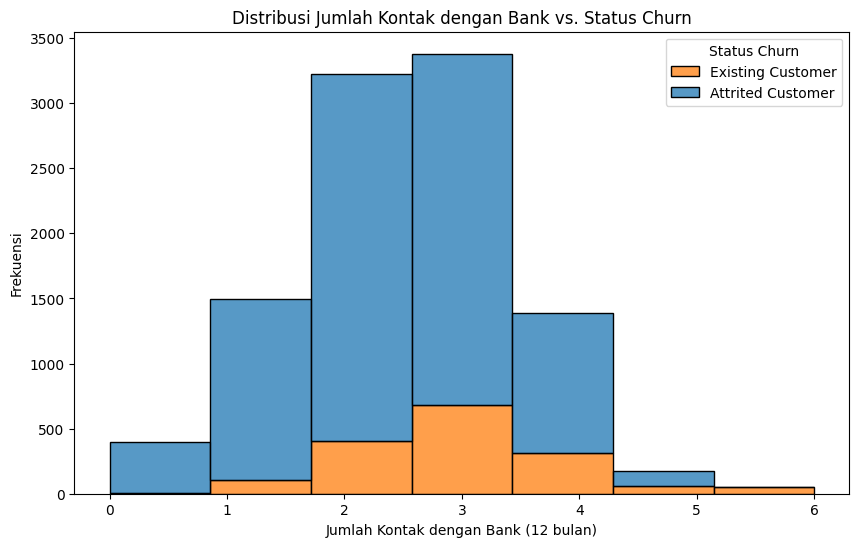

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame yang berisi data dengan kolom 'contacts_count_12_mon' dan 'attrition_flag'
# Mengubah 'attrition_flag' menjadi numerik jika perlu (0 = Existing Customer, 1 = Attrited Customer)
df['attrition_flag_numeric'] = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Membuat histogram untuk membandingkan jumlah kontak dengan bank antara churn dan non-churn
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='contacts_count_12_mon', hue='attrition_flag', multiple='stack', bins=7)

plt.title('Distribusi Jumlah Kontak dengan Bank vs. Status Churn')
plt.xlabel('Jumlah Kontak dengan Bank (12 bulan)')
plt.ylabel('Frekuensi')
plt.legend(title='Status Churn', labels=['Existing Customer', 'Attrited Customer'])

plt.show()





Korelasi Spearman yang positif (0.189) mengindikasikan adanya hubungan positif yang lemah hingga moderat antara jumlah interaksi dengan bank dan kemungkinan churn. Meskipun hubungan ini tidak sangat kuat, namun ada indikasi bahwa semakin sering nasabah berinteraksi dengan bank, semakin besar kemungkinan mereka untuk churn. Hal ini mungkin menunjukkan bahwa nasabah yang lebih sering berinteraksi dengan bank memiliki masalah atau ketidakpuasan yang lebih besar.

Hasil uji t-test yang sangat signifikan (p-value = 4.7e-96) menunjukkan bahwa ada perbedaan yang sangat besar dalam jumlah interaksi antara nasabah yang churn dan yang tidak churn. Ini berarti jumlah interaksi dengan bank merupakan faktor yang membedakan nasabah yang tetap menjadi pelanggan dengan nasabah yang churn.

#Buatlah model prediksi dengan menggunakan model machine learning (bebas, tidak dibatasi) dan evaluasi seberapa baik model yang anda buat. Catatan: soal ini akan dinilai berdasarkan apakah mentee sudah menggunakan workflow dengan benar


In [18]:
import pandas as pd

# Load dataset dari URL ke dalam DataFrame
url = "https://bit.ly/adv_bi_bank_cust_churn"
df = pd.read_csv(url)

# Tampilkan beberapa baris pertama untuk memastikan data berhasil dimuat
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Model machine learning yang saya buat untuk memprediksi attrition_flag (status pelanggan: Attrited atau Existing) menggunakan tiga model yang berbeda, yaitu Logistic Regression, Random Forest, dan Gradient Boosting.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Label Encoding untuk kolom 'attrition_flag'
label_encoder = LabelEncoder()
df['attrition_flag_numeric'] = label_encoder.fit_transform(df['attrition_flag'])

# One-Hot Encoding untuk kolom kategorikal
df = pd.get_dummies(df, columns=['gender', 'education_level', 'marital_status', 'income_category', 'card_category'], drop_first=True)


In [22]:
# Pisahkan fitur dan target
X = df.drop(['user_id', 'attrition_flag', 'attrition_flag_numeric'], axis=1)
y = df['attrition_flag_numeric']

In [23]:
# Pembagian data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)


In [26]:
# Melatih model
rf_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [27]:
# Prediksi dengan model yang dilatih
rf_pred = rf_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

In [28]:
# Evaluasi model
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_pred))

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, gb_pred))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       327
           1       0.96      0.99      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       327
           1       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.97      2026
 

Random Forest memberikan hasil yang sangat baik dalam memprediksi churn, dengan recall yang sangat tinggi (0.99) untuk Attrited Customer. Ini menunjukkan bahwa model ini sangat baik dalam menangkap customer yang akan churn. F1-score yang tinggi (0.97) juga menunjukkan keseimbangan yang baik antara precision dan recall.

Logistic Regression memiliki accuracy yang lebih rendah (0.90) dibandingkan dengan model lainnya, meskipun recall untuk Attrited Customer masih cukup tinggi (0.97). Precision-nya lebih rendah (0.92) dibandingkan dengan model Random Forest dan Gradient Boosting.

Gradient Boosting memberikan kinerja terbaik, dengan accuracy tertinggi (0.97), precision (0.97), dan recall (0.99) yang sangat baik untuk Attrited Customer, serta F1-score yang tinggi (0.98). Model ini juga menunjukkan keseimbangan yang sangat baik antara kedua metrik penting ini.

Secara keseluruhan, ** **Gradient Boosting adalah model yang paling efektif dalam mengidentifikasi churn** ** dibandingkan dengan Random Forest dan Logistic Regression, dengan kinerja terbaik secara keseluruhan.

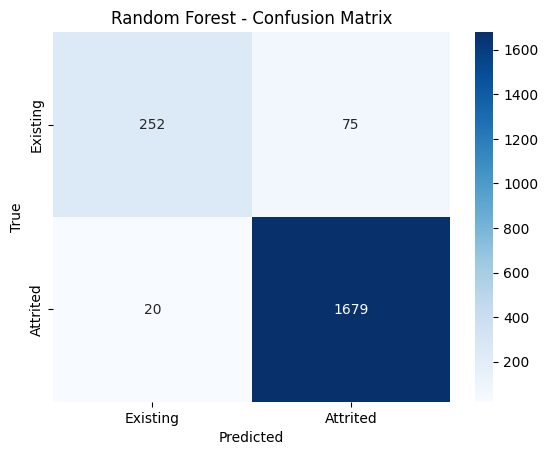

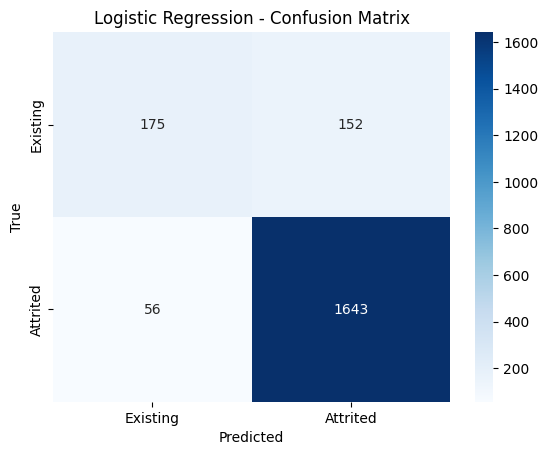

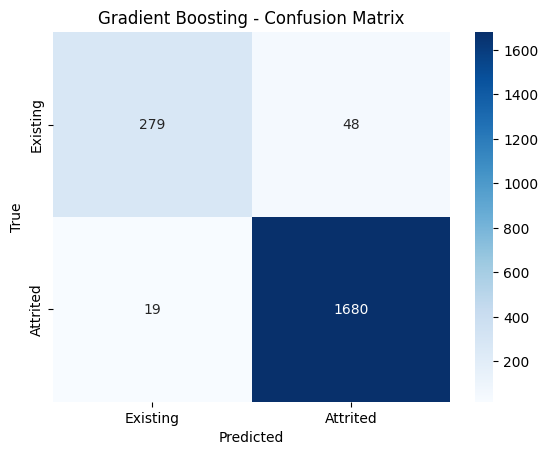

In [29]:
# Menampilkan Confusion Matrix untuk masing-masing model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, rf_pred, 'Random Forest')
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')
plot_confusion_matrix(y_test, gb_pred, 'Gradient Boosting')

In [30]:
from sklearn.dummy import DummyClassifier  # Import the DummyClassifier
# Baseline: Model yang memprediksi semua pelanggan tidak churn (selalu 'Existing')
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train_scaled, y_train)
dummy_pred = dummy_model.predict(X_test_scaled)

In [31]:
print("DummyClassifier - Classification Report:")
print(classification_report(y_test, dummy_pred))

DummyClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026



In [32]:
# dan mendapatkan prediksi seperti berikut:
rf_pred = rf_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

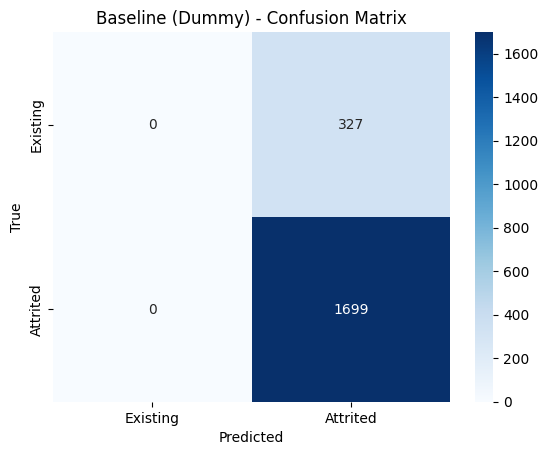

In [33]:
# Confusion Matrix untuk setiap model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, dummy_pred, 'Baseline (Dummy)')

In [34]:
print("Baseline (Dummy) - Classification Report:")
print(classification_report(y_test, gb_pred))

Baseline (Dummy) - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [35]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Prediksi probabilitas untuk AUC-ROC
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]
gb_prob = gb_model.predict_proba(X_test_scaled)[:, 1]
dummy_prob = dummy_model.predict_proba(X_test_scaled)[:, 1]

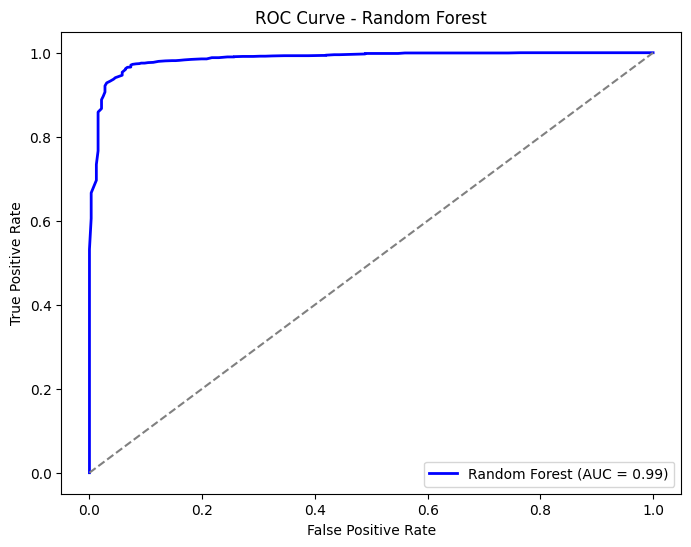

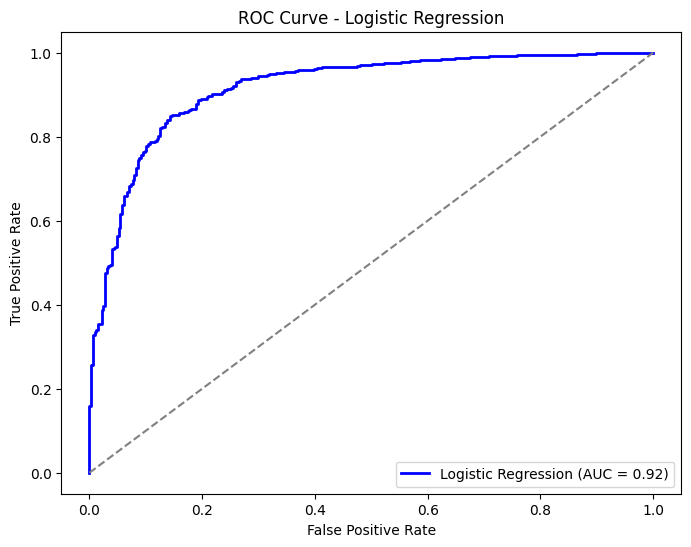

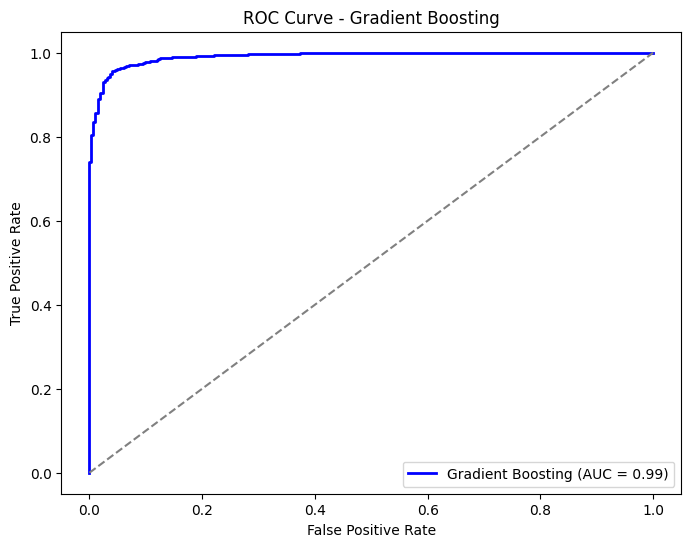

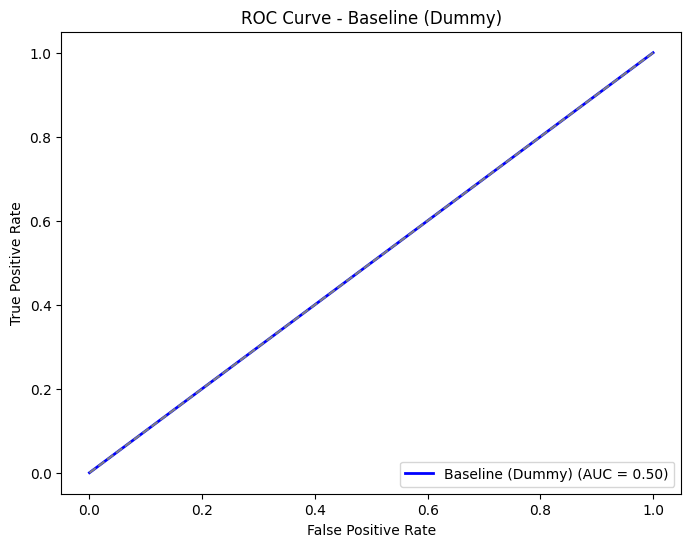

In [36]:
from sklearn.metrics import roc_curve, auc

# Visualisasi ROC Curve untuk model dan baseline
plot_roc_curve(y_test, rf_prob, 'Random Forest')
plot_roc_curve(y_test, lr_prob, 'Logistic Regression')
plot_roc_curve(y_test, gb_prob, 'Gradient Boosting')
plot_roc_curve(y_test, dummy_prob, 'Baseline (Dummy)')

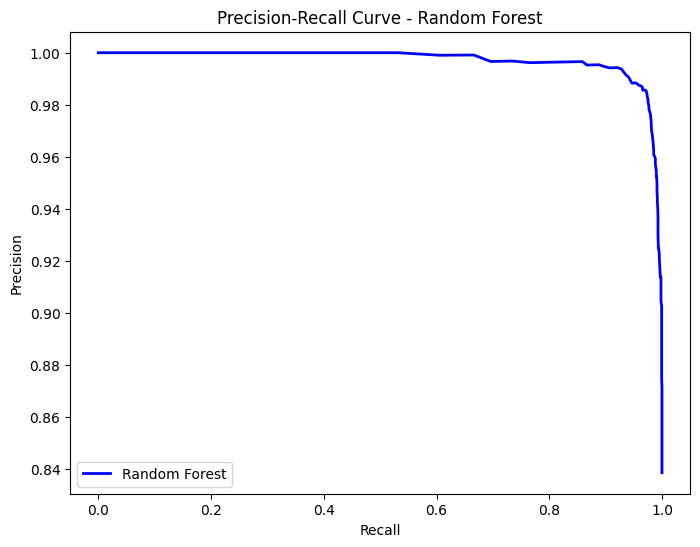

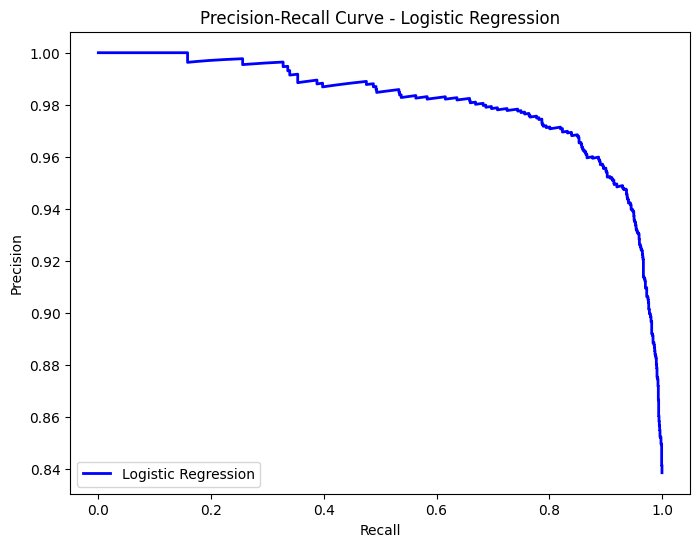

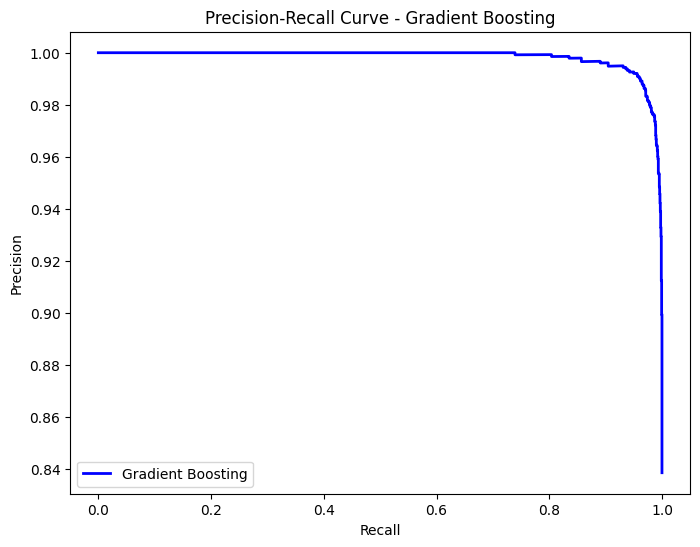

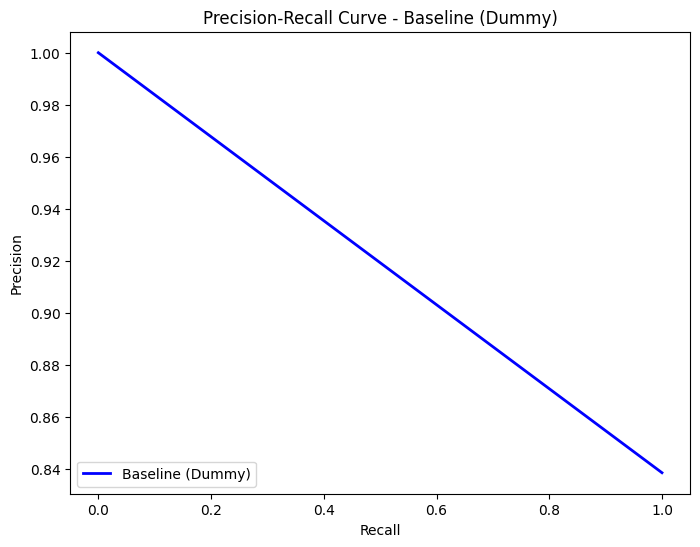

In [37]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=model_name)
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower left")
    plt.show()

# Visualisasi Precision-Recall Curve untuk model dan baseline
plot_precision_recall_curve(y_test, rf_prob, 'Random Forest')
plot_precision_recall_curve(y_test, lr_prob, 'Logistic Regression')
plot_precision_recall_curve(y_test, gb_prob, 'Gradient Boosting')
plot_precision_recall_curve(y_test, dummy_prob, 'Baseline (Dummy)')

Rekomendasi Umum untuk Mengurangi Churn:
Segmentasi Nasabah Berdasarkan Profil: Gunakan model untuk menganalisis nasabah yang cenderung churn dan buatlah strategi retensi yang spesifik berdasarkan usia, pendapatan, pendidikan, dan frekuensi interaksi.

Pengembangan Layanan yang Lebih Personal: Pastikan setiap kelompok nasabah merasa diperhatikan dengan layanan yang dipersonalisasi. Program loyalitas dan penghargaan dapat memotivasi nasabah untuk tetap setia.

Optimalkan Penggunaan Teknologi dan Digital: Membantu nasabah yang mungkin lebih muda atau berpendapatan lebih rendah dengan solusi digital dan produk keuangan yang lebih sesuai bisa membantu mengurangi churn.

Meningkatkan Komunikasi: Jangan hanya mengandalkan interaksi yang terjadwal. Gunakan komunikasi yang lebih sering dan personal, baik melalui email, aplikasi, atau pesan langsung untuk meningkatkan hubungan dengan nasabah.

#Permutation Feature Importance

Metode ini mengukur pentingnya fitur dengan cara mengacak (permutasi) nilai-nilai fitur dan mengamati dampaknya terhadap performa model. Fitur yang memiliki dampak besar pada model akan menurunkan akurasi secara signifikan ketika diacak.

Feature importance menggambarkan sejauh mana fitur (kolom dalam dataset) berkontribusi terhadap prediksi yang dibuat oleh model. Semakin tinggi nilai feature importance, semakin besar peran fitur tersebut dalam keputusan model. Ini membantu kita mengetahui fitur mana yang lebih penting untuk prediksi dan yang mana yang kurang berpengaruh.

In [38]:
# Pisahkan fitur dan target
X = df.drop(['user_id', 'attrition_flag', 'attrition_flag_numeric'], axis=1)
y = df['attrition_flag_numeric']
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
# Latih model RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
from sklearn.inspection import permutation_importance

 #Hitung permutation importance
results = permutation_importance(model, X_test, y_test, scoring='accuracy')


In [41]:
# Menampilkan hasil
import pandas as pd
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': results.importances_mean
})

# Urutkan berdasarkan importance
importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df)

                           feature  importance
11                  total_trans_ct    0.095492
10                 total_trans_amt    0.044554
3         total_relationship_count    0.024613
7              total_revolving_bal    0.021981
12             total_ct_chng_q4_q1    0.015005
9             total_amt_chng_q4_q1    0.009674
5            contacts_count_12_mon    0.007108
4           months_inactive_12_mon    0.005462
6                     credit_limit    0.003225
0                     customer_age    0.002830
8                  avg_open_to_buy    0.002698
14                        gender_M    0.002369
2                   months_on_book    0.001053
1                  dependent_count    0.000856
27  income_category_Less than $40K    0.000790
20         education_level_Unknown    0.000592
15       education_level_Doctorate    0.000526
13           avg_utilization_ratio    0.000461
26    income_category_$80K - $120K    0.000461
16        education_level_Graduate    0.000395
31           

In [42]:
# Ambil nilai penting rata-rata untuk setiap fitur
feature_importances = results.importances_mean

In [43]:

# Urutkan fitur berdasarkan importance
sorted_idx = feature_importances.argsort()

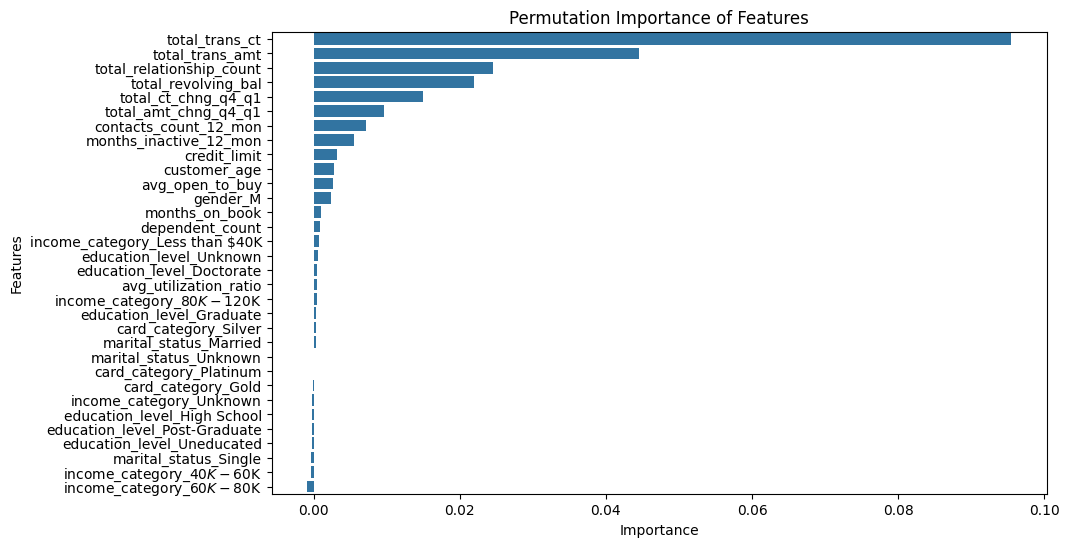

In [44]:
# Visualisasi menggunakan seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

total_trans_ct (Total Transaction Count):

Fitur ini menggambarkan jumlah transaksi yang dilakukan oleh nasabah dalam periode tertentu. Jika fitur ini memiliki feature importance yang tinggi, artinya model melihat jumlah transaksi sebagai indikator penting dalam memprediksi churn. Misalnya, nasabah yang sering melakukan transaksi dengan bank mungkin memiliki hubungan yang lebih kuat dengan bank, sehingga lebih kecil kemungkinannya untuk churn. Sebaliknya, nasabah yang jarang bertransaksi dapat dianggap lebih berisiko untuk churn. Jika model menunjukkan bahwa nasabah dengan jumlah transaksi rendah lebih cenderung churn, bank bisa meningkatkan engagement dengan menyediakan insentif untuk transaksi lebih sering (misalnya promosi transaksi atau fitur yang mendorong penggunaan lebih sering).


total_trans_amt (Total Transaction Amount):

Fitur ini menggambarkan jumlah total uang yang ditransaksikan oleh nasabah dalam periode tertentu. Nasabah yang melakukan transaksi dengan jumlah besar mungkin lebih aktif atau lebih terlibat dengan layanan bank. Jika fitur ini memiliki feature importance yang tinggi, maka jumlah transaksi mungkin menjadi indikator kuat dalam memprediksi churn. Bank dapat menggunakan fitur ini untuk mengidentifikasi nasabah dengan transaksi besar tetapi potensi churn yang tinggi, lalu menargetkan mereka dengan penawaran yang disesuaikan untuk meningkatkan loyalitas.

total_relationship_count (Total Relationship Count):

Fitur ini mengukur jumlah layanan atau produk yang dimiliki nasabah di bank, seperti rekening tabungan, kartu kredit, pinjaman, dll. Jika nasabah memiliki banyak produk di bank, maka hubungan mereka dengan bank lebih kuat. Semakin banyak layanan yang dimiliki, semakin kecil kemungkinan nasabah tersebut untuk churn. Untuk nasabah dengan hubungan yang lebih sedikit dengan bank, bank bisa memanfaatkan fitur ini untuk menawarkan produk atau layanan tambahan guna meningkatkan hubungan dan mengurangi kemungkinan churn.

total_revolving_bal (Total Revolving Balance):

Fitur ini menggambarkan total saldo utang yang belum dilunasi pada kartu kredit atau produk revolvable lainnya. Fitur ini penting karena saldo utang yang tinggi mungkin mengindikasikan kesulitan keuangan atau ketergantungan pada fasilitas kredit, yang bisa menjadi faktor risiko untuk churn. Bank bisa menggunakan fitur ini untuk mendeteksi nasabah yang memiliki saldo utang tinggi dan menawarkan bantuan, seperti restrukturisasi utang atau produk pinjaman dengan bunga lebih rendah, guna mengurangi kemungkinan churn.

Dari feature importance yang lebih tinggi pada fitur-fitur tersebut, kita bisa menyimpulkan bahwa model menunjukkan bahwa aktivitas transaksi, jumlah produk yang dimiliki, dan saldo utang adalah faktor penting dalam memprediksi churn. Nasabah yang lebih aktif bertransaksi, memiliki lebih banyak produk dengan bank, dan memiliki saldo utang yang lebih rendah cenderung memiliki kemungkinan churn yang lebih rendah.

Namun, sebaliknya, nasabah yang jarang bertransaksi, memiliki sedikit produk, dan memiliki saldo utang tinggi mungkin lebih rentan terhadap churn. Oleh karena itu, untuk mengurangi churn, bank dapat Menawarkan produk atau insentif kepada nasabah yang jarang bertransaksi untuk meningkatkan interaksi mereka. Meningkatkan penawaran produk bagi nasabah yang hanya menggunakan satu layanan. Memberikan solusi finansial bagi nasabah yang memiliki saldo utang tinggi untuk mengurangi ketergantungan mereka pada kredit.

Rekomendasi Bisnis:
Segmentasi Nasabah: Berdasarkan feature importance, bank dapat memisahkan nasabah menjadi beberapa segmen berdasarkan fitur seperti jumlah transaksi, saldo utang, dan jumlah produk yang dimiliki. Ini akan membantu dalam merancang strategi pemasaran yang lebih tepat sasaran.
Kampanye Retensi: Mengingat pentingnya jumlah transaksi dan jumlah produk yang dimiliki nasabah, bank dapat melakukan kampanye untuk mendorong nasabah yang jarang bertransaksi atau memiliki produk terbatas untuk meningkatkan interaksi dan memperpanjang hubungan mereka dengan bank.
Penyuluhan Keuangan: Untuk nasabah dengan saldo utang tinggi, bank dapat menawarkan penyuluhan keuangan atau program konseling utang guna membantu nasabah mengelola keuangan mereka dan mengurangi risiko churn.